# Revamp on Data Exploration due to Poor splitting of train/valid/test data

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import io
from sklearn.model_selection import train_test_split

## Carvana Data

In [116]:
df = pd.read_csv('../data/metadata_data-source2.csv')
df = df.dropna()

df["label"] = df["make"] + " " + df["model"]
df.head()

,id,year,make,model,trim1,trim2,label
0,0004d4463b50,2014.0,Acura,TL,TL,w/SE,Acura TL
1,00087a6bd4dc,2014.0,Acura,RLX,RLX,w/Tech,Acura RLX
2,000aa097d423,2012.0,Mazda,MAZDA6,MAZDA6,i Sport,Mazda MAZDA6
3,000f19f6e7d4,2016.0,Chevrolet,Camaro,Camaro,SS,Chevrolet Camaro
4,00144e887ae9,2015.0,Acura,TLX,TLX,SH-AWD V6 w/Advance Pkg,Acura TLX


## Stanford Data

In [117]:
df2 = pd.read_csv("../data/cardatasettrain.csv")
df2.head()

labels_for_2 = io.loadmat('../data/cars_annos.mat')['class_names'][0]
fixed_labels_for_2 = []
for label in labels_for_2:
    split_label = label[0].split(' ')
    make = split_label[0:-2]
    year = split_label[-1]
    fixed_labels_for_2.append(f'{" ".join(make)}')

for i in range(10):
    print(fixed_labels_for_2[i])

AM General Hummer
Acura RL
Acura TL
Acura TL
Acura TSX
Acura Integra Type
Acura ZDX
Aston Martin V8 Vantage
Aston Martin V8 Vantage
Aston Martin Virage


## Generate Combined Data CSV

In [118]:
df2['label'] = df2.apply(lambda x: fixed_labels_for_2[x['Class'] - 1], axis=1)
df2.head()

,Unnamed: 0,x1,y1,x2,y2,Class,image,label
0,0,39,116,569,375,14,00001.jpg,Audi TTS
1,1,36,116,868,587,3,00002.jpg,Acura TL
2,2,85,109,601,381,91,00003.jpg,Dodge Dakota Club
3,3,621,393,1484,1096,134,00004.jpg,Hyundai Sonata Hybrid
4,4,14,36,133,99,106,00005.jpg,Ford F-450 Super Duty Crew


In [119]:
df['file'] = df['id']
df2['file'] = df2.apply(lambda x: x['image'].split('.')[0], axis=1)

temp = pd.concat([df, df2])
temp.head()

,id,year,make,model,trim1,trim2,label,file,Unnamed: 0,x1,y1,x2,y2,Class,image
0,0004d4463b50,2014.0,Acura,TL,TL,w/SE,Acura TL,0004d4463b50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00087a6bd4dc,2014.0,Acura,RLX,RLX,w/Tech,Acura RLX,00087a6bd4dc,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000aa097d423,2012.0,Mazda,MAZDA6,MAZDA6,i Sport,Mazda MAZDA6,000aa097d423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000f19f6e7d4,2016.0,Chevrolet,Camaro,Camaro,SS,Chevrolet Camaro,000f19f6e7d4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00144e887ae9,2015.0,Acura,TLX,TLX,SH-AWD V6 w/Advance Pkg,Acura TLX,00144e887ae9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
final_df = temp[['file', 'label']]
final_df = final_df[final_df['label'].map(final_df['label'].value_counts()) > 10]
final_df.head()
final_df.to_csv('no_electric.csv')

In [121]:
print(f"Unique Label Count: {len(pd.unique(final_df['label']))}")
print(f"Number of labels: {len(final_df['label'])}")

Unique Label Count: 284
Number of labels: 13963


Honda Accord                   236
Honda Civic                    217
Toyota Camry                   167
Toyota Corolla                 163
GMC Terrain                    152
                              ... 
Mercedes-Benz GLA               11
Volkswagen CC                   11
Toyota Prius Plug-in Hybrid     11
MINI Countryman                 11
Audi Q5                         11
Name: label, Length: 284, dtype: int64


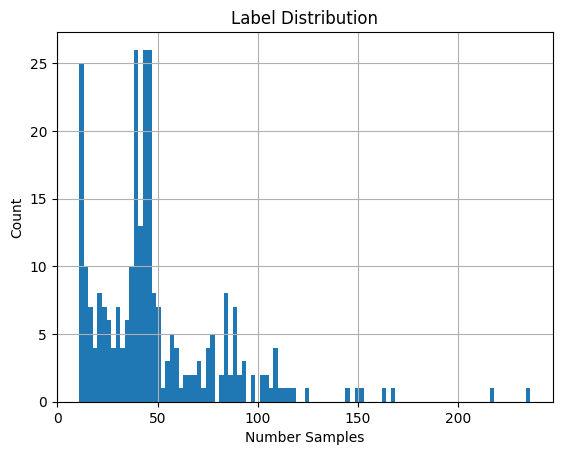

In [129]:
fig, ax = plt.subplots()
# ax.set_xticklabels(f"{}")


print(final_df['label'].value_counts())
final_df['label'].value_counts().hist(ax=ax, bins=100)
ax.set_title("Label Distribution")
ax.set_ylabel("Number of labels that have this many samples")
ax.set_xlabel("Number Samples")

test = final_df['label'].value_counts()

## Train, Valid, Test Split

#### Verify each train, valid and test dataset have representation of each label

In [130]:
train, valid = train_test_split(final_df, test_size=0.15, stratify=final_df['label'])
train, test = train_test_split(train, test_size=0.10, stratify=train['label'])

print(f"Number of labels: {len(train['label'])}")
print(f"Number of labels: {len(valid['label'])}")
print(f"Number of labels: {len(test['label'])}")

print(len(pd.unique(train['label'])))
print(len(pd.unique(valid['label'])))
print(len(pd.unique(test['label'])))

Number of labels: 10681
Number of labels: 2095
Number of labels: 1187
284
284
284


In [131]:
train.to_csv("no_electric_train.csv")
valid.to_csv("no_electric_valid.csv")
test.to_csv("no_electric_test.csv")